# Build PCA

## Why do Dimensionality Reduction?

### 1 - Space Efficiency
### 2 - Computing Efficiency
### 3 - Visualization (so we can always analyze by human eye)

### Build PCA and compare it to T-SNE and LDA (3 DR methods total)


In [3]:
import numpy as np
np.random.seed(1)

In [7]:
# Step 1 - Create our dataset

mu_vec1 = np.array([0, 0, 0]) # sample mean
cov_mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) # sample covariance


# 3 x 20 matrix 3 columns with 20 rows 
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print(class1_sample)

[[-0.02461696  1.96710175  1.62765075  0.86334532 -1.23005814 -0.62353073
   0.80186103 -0.10174587  0.52946532  0.61838026 -0.31011677  2.18697965
  -0.13644474 -1.12201873  0.24879916 -0.17470316  2.19069973  0.90148689
   0.04366899 -0.28730786]
 [-0.77516162 -1.85798186  0.3380117  -0.1809203   0.5505375   0.52057634
   0.0465673   0.86888616  0.13770121  0.23249456 -2.43483776  0.44136444
  -0.11905419 -0.51709446 -0.29664115  0.98633519 -1.89636092  2.52832571
  -0.22631424  0.68006984]
 [ 1.27375593  1.23616403 -1.19926803 -0.60392063  0.79280687 -1.14434139
  -0.18656977  0.75041164  0.07782113  0.68255141  1.0388246  -0.10015523
   0.01740941 -0.99702683  0.49521132  0.2135339  -0.64691669 -0.24863478
   1.33145711 -0.3198016 ]]


In [9]:
mu_vec2 = np.array([1, 1, 1]) # sample mean
cov_mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) # sample covariance


# 3 x 20 matrix 3 columns with 20 rows 
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
print(class2_sample)

[[ 0.50178644 -0.39662042  1.61853913 -0.30572692 -1.793085   -0.04458938
   1.42952614 -0.52568032  1.1340482   1.26246745  1.83600472  1.88490881
  -0.44087602  2.39984394  1.09542509  1.21112476 -0.11647002  0.94317552
   0.91549197  1.78477065]
 [ 0.68901502  0.13868364  0.55682807  0.65501279  2.93752881  3.05117344
   0.3930016   1.79502609  2.20205486  1.2764993   2.54335911  0.12271848
   2.23225307  0.21808832  1.92145007  1.01652757  1.0809271   1.49233656
   0.70263812  0.04457474]
 [ 0.99810852  1.67471153  2.81053491  0.76916026  1.36633201  1.585662
   1.10622272  0.62556168  1.28474811  0.2667284   1.75880566  0.13221278
   0.74582013  0.56249102  1.0607502   1.17718772  0.81342101  0.31932186
   1.417302    1.58591043]]


Populating the interactive namespace from numpy and matplotlib


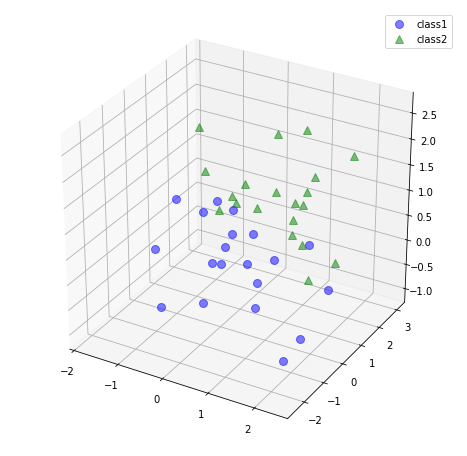

In [19]:
# Step 2 Plot the Data

%pylab inline

#plotting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#figure, width and height
fig = plt.figure(figsize=(8,8))
#3d subplot
#These are subplot grid parameters encoded as a single integer, so 1x1 grid 1st subplot
ax = fig.add_subplot(111, projection='3d')
#fontsize
plt.rcParams['legend.fontsize'] = 10

#plot samples
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=0.5, color='green', label='class2')

ax.legend(loc='upper right')

plt.show()

In [21]:
# Step 3 Merge the Data

all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
all_samples

array([[-0.02461696,  1.96710175,  1.62765075,  0.86334532, -1.23005814,
        -0.62353073,  0.80186103, -0.10174587,  0.52946532,  0.61838026,
        -0.31011677,  2.18697965, -0.13644474, -1.12201873,  0.24879916,
        -0.17470316,  2.19069973,  0.90148689,  0.04366899, -0.28730786,
         0.50178644, -0.39662042,  1.61853913, -0.30572692, -1.793085  ,
        -0.04458938,  1.42952614, -0.52568032,  1.1340482 ,  1.26246745,
         1.83600472,  1.88490881, -0.44087602,  2.39984394,  1.09542509,
         1.21112476, -0.11647002,  0.94317552,  0.91549197,  1.78477065],
       [-0.77516162, -1.85798186,  0.3380117 , -0.1809203 ,  0.5505375 ,
         0.52057634,  0.0465673 ,  0.86888616,  0.13770121,  0.23249456,
        -2.43483776,  0.44136444, -0.11905419, -0.51709446, -0.29664115,
         0.98633519, -1.89636092,  2.52832571, -0.22631424,  0.68006984,
         0.68901502,  0.13868364,  0.55682807,  0.65501279,  2.93752881,
         3.05117344,  0.3930016 ,  1.79502609,  2.

In [22]:
all_samples.T

array([[-0.02461696, -0.77516162,  1.27375593],
       [ 1.96710175, -1.85798186,  1.23616403],
       [ 1.62765075,  0.3380117 , -1.19926803],
       [ 0.86334532, -0.1809203 , -0.60392063],
       [-1.23005814,  0.5505375 ,  0.79280687],
       [-0.62353073,  0.52057634, -1.14434139],
       [ 0.80186103,  0.0465673 , -0.18656977],
       [-0.10174587,  0.86888616,  0.75041164],
       [ 0.52946532,  0.13770121,  0.07782113],
       [ 0.61838026,  0.23249456,  0.68255141],
       [-0.31011677, -2.43483776,  1.0388246 ],
       [ 2.18697965,  0.44136444, -0.10015523],
       [-0.13644474, -0.11905419,  0.01740941],
       [-1.12201873, -0.51709446, -0.99702683],
       [ 0.24879916, -0.29664115,  0.49521132],
       [-0.17470316,  0.98633519,  0.2135339 ],
       [ 2.19069973, -1.89636092, -0.64691669],
       [ 0.90148689,  2.52832571, -0.24863478],
       [ 0.04366899, -0.22631424,  1.33145711],
       [-0.28730786,  0.68006984, -0.3198016 ],
       [ 0.50178644,  0.68901502,  0.998

In [ ]:
# Step 4 Compute the Dimensional Mean Vector, it will help compute the covariance matrix


